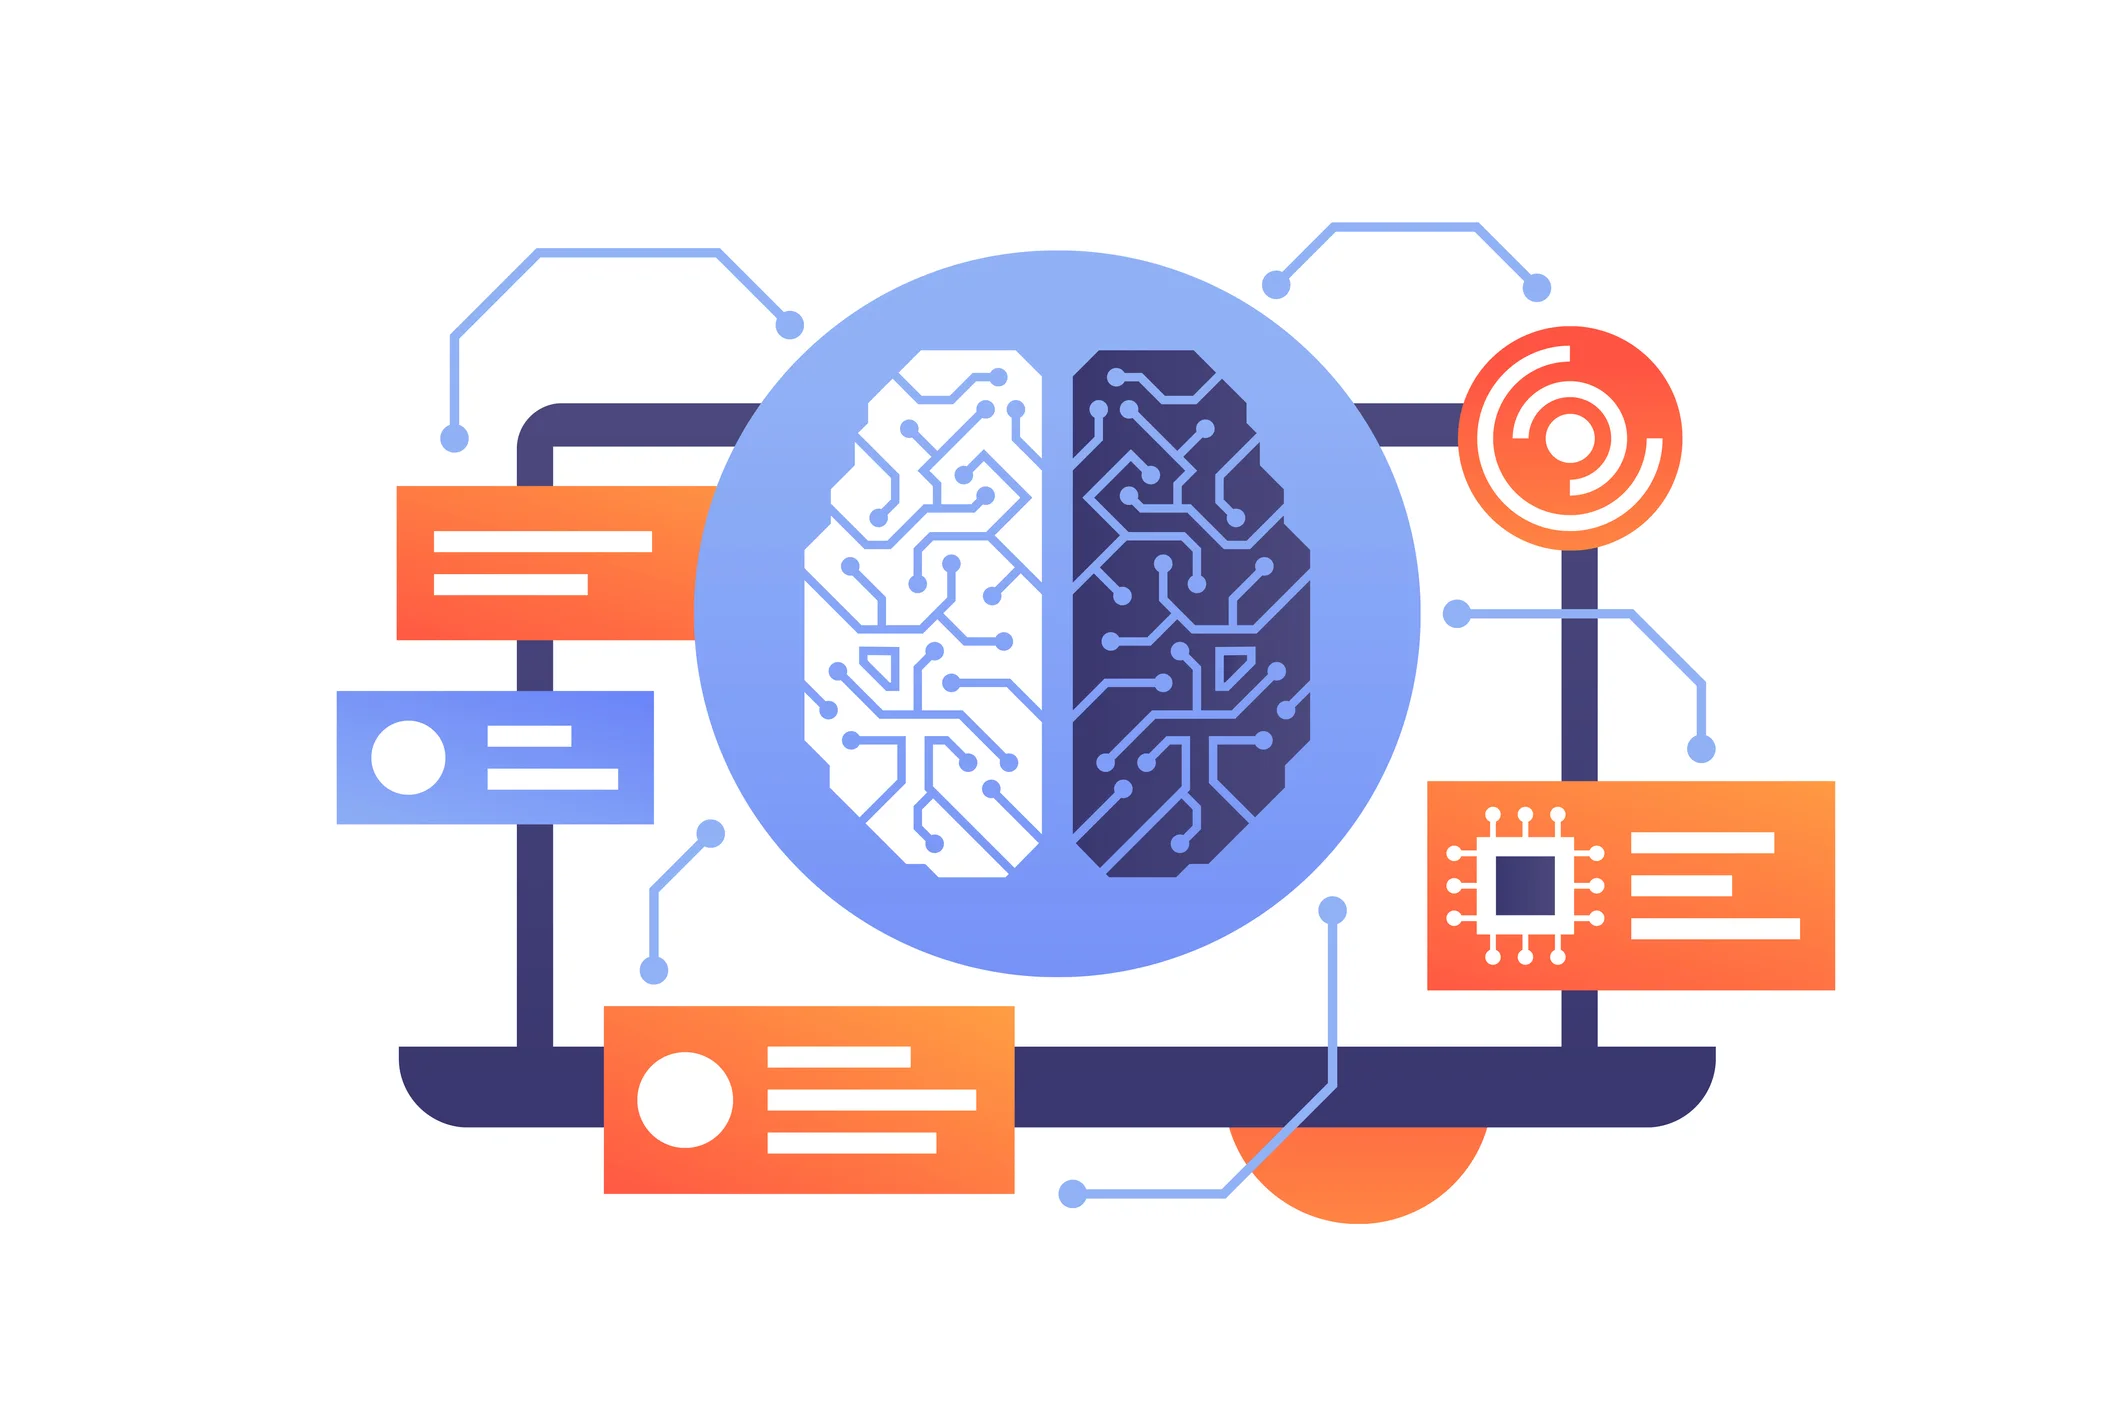

**_Data modeling plays a significant role in HR analytics when integrating machine learning techniques. Machine learning algorithms leverage data models to make predictions, classifications, and recommendations based on patterns and relationships found in the HR data._**

# outline


- Importing Various Modules
- Loading Dataset
- Label Encoding
- Data Processing
- Train and Test Dataset
- Data Modeling
   - 1] Logistic Regression
   - 2] Random Forest
   - 3] Support Vector Machine
   - 4] XGBOOST
   - 5] LIGHTGBM
   - 6] CATBOOST
   - 7] ADABOOST
- Comparing Model Performance

# IMPORTING VARIOUS MODULES

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

# Library for Data Manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Library for Statistical Modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

print("==================== Packages Loaded ======================")

# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


### LOADING DATASET

In [2]:
employee_data = pd.read_csv(r'IBM-HR-Analytics-Employee-Attrition-and-Performance-Revised.csv')

In [3]:
# Print top 5 rows in the dataframe.
employee_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,Junior Level,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,Junior Level,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,Entry Level,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,Entry Level,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,Entry Level,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


In [4]:
# Print bottom 5 rows in the dataframe.
employee_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,Junior Level,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,Mid Level,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,Junior Level,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,Junior Level,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,82,Very High,Junior Level,Laboratory Technician,High,Married,4404,10228,2,No,12,Excellent,Low,0,6,3,Best,4,3,1,2


In [5]:
# Print the shape of the DataFrame
print("The shape of data frame:", employee_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(employee_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(employee_data.columns))

The shape of data frame: (1470, 31)
Number of Rows in the dataframe: 1470
Number of Columns in the dataframe: 31


### LABEL ENCODING

In [6]:
# Convert categorical variables into numerical form. 
label = LabelEncoder()
employee_data["Attrition"] = label.fit_transform(employee_data.Attrition)

In [7]:
 employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### DATA PROCESSING

In [8]:
# Transform categorical data into dummies
dummy_col = [column for column in employee_data.drop('Attrition', axis=1).columns if employee_data[column].nunique() < 20]
data = pd.get_dummies(employee_data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [9]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<AxesSubplot:>

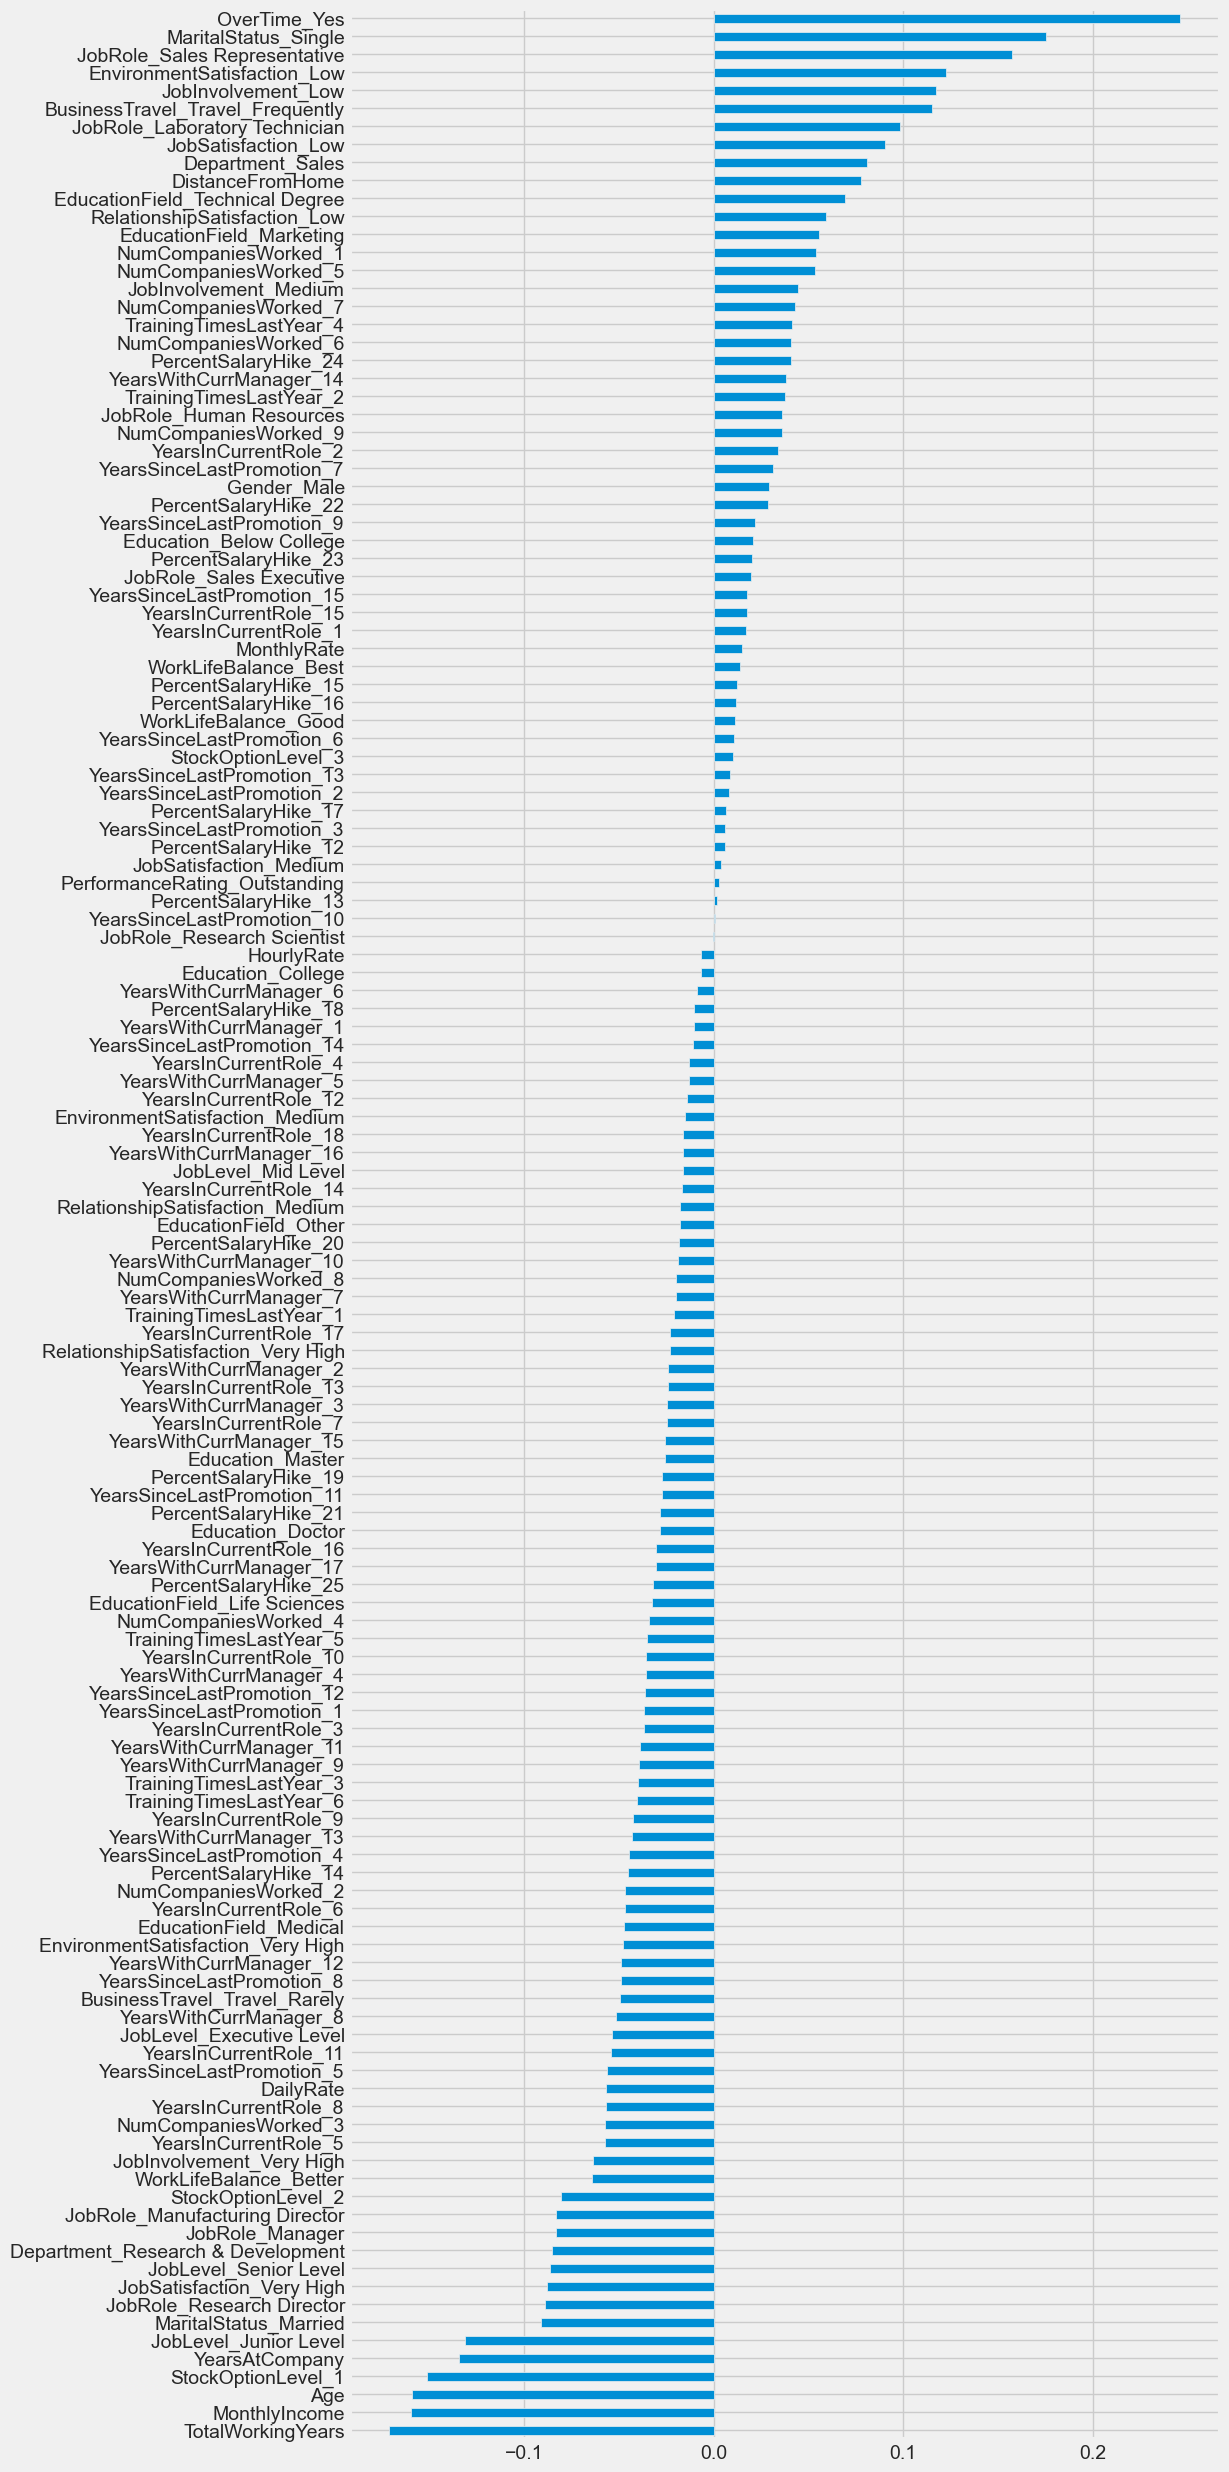

In [10]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [11]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

94

### TRAIN AND TEST DATASET

In [12]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [13]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [14]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [15]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.87%
Leaving Rate: 16.13%
===============TEST=================
Staying Rate: 83.90%
Leaving Rate: 16.10%


In [16]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

### LOGISTIC REGRESSION

In [17]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 59 107]]
ACCURACY SCORE:
0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934879    0.869919  0.927114     0.902399      0.924399
recall       0.981460    0.644578  0.927114     0.813019      0.927114
f1-score     0.957603    0.740484  0.927114     0.849044      0.922577
support    863.000000  166.000000  0.927114  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 41  30]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895408   0.612245  0.863946    0.753827      0.849820
recall       0.948649   0.422535  0.863946    0.685592      0.863946
f1-score     0.921260   0.500000  0.863946    0.710630      0.853438
support    370.000000  71.000000  0.863946  441.000000    441.000000


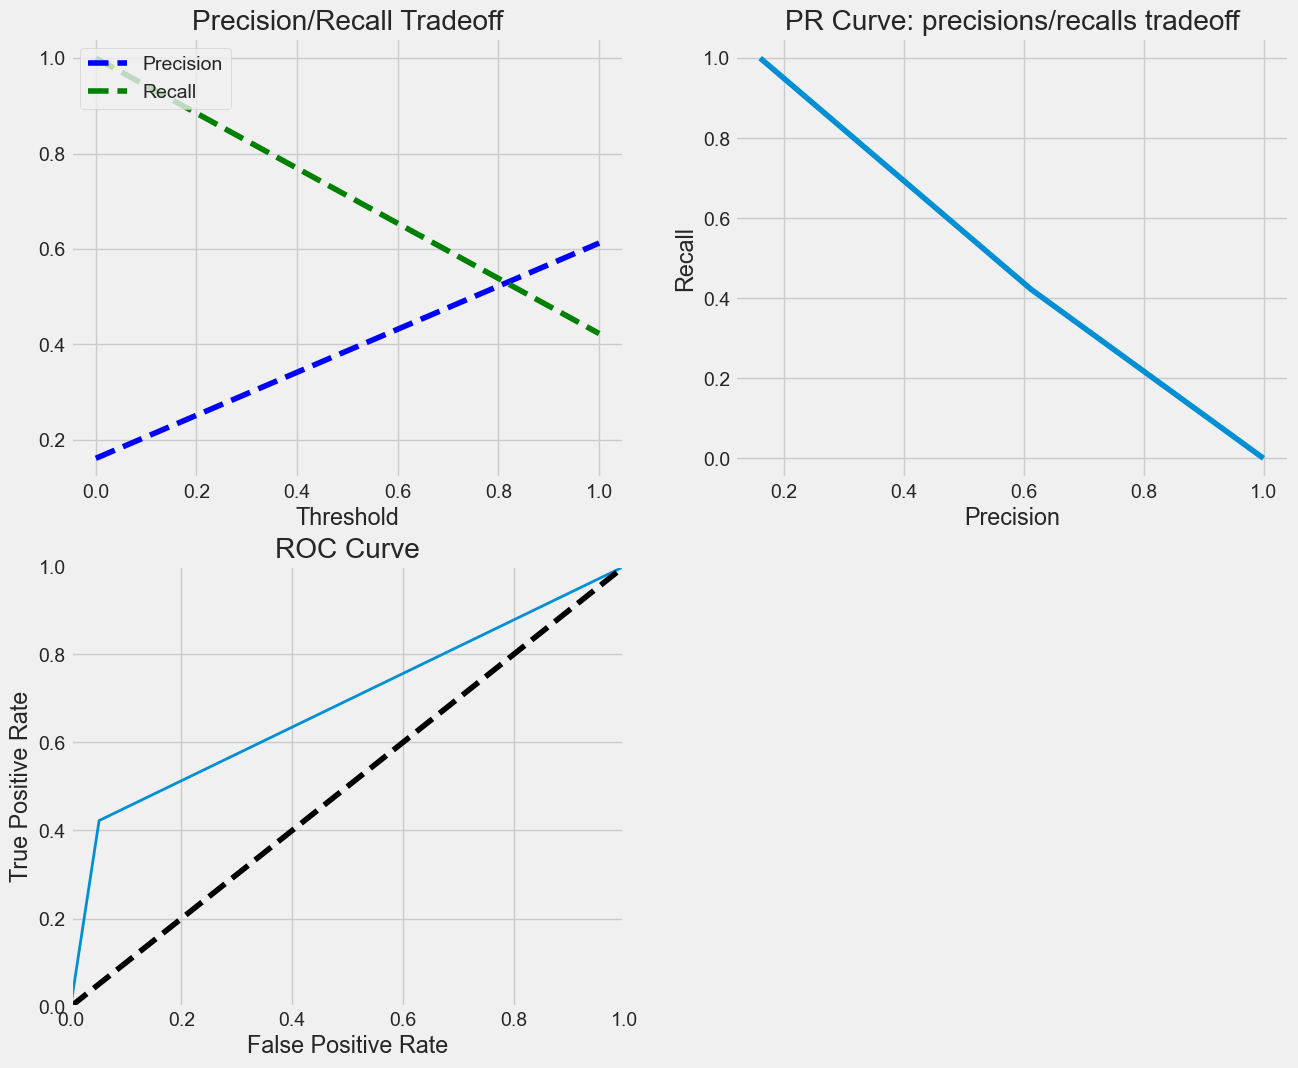

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [19]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

### RANDOM FOREST CLASSIFIER

In [20]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[361   9]
 [ 62   9]]
ACCURACY SCORE:
0.8390
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853428   0.500000  0.839002    0.676714      0.796527
recall       0.975676   0.126761  0.839002    0.551218      0.839002
f1-score     0.910467   0.202247  0.839002    0.556357      0.796445
support    370.000000  71.000000  0.839002  441.000000    441.000000


In [21]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [113  53]]
ACCURACY SCORE:
0.8902
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.884221    1.000000  0.890185     0.942111      0.902899
recall       1.000000    0.319277  0.890185     0.659639      0.890185
f1-score     0.938554    0.484018  0.890185     0.711286      0.865227
support    863.000000  166.000000  0.890185  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[365   5]
 [ 65   6]]
ACCURACY SCORE:
0.8413
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848837   0.545455   0.84127    0.697146      0.799993
recall       0.986486   0.084507   0.84127    0.535497      0.841270
f1-score     0.912500   0.146341   0.84127    0.529421      0.789150
support    370.000000  71.000000   0.84127  441.000000    441.000000


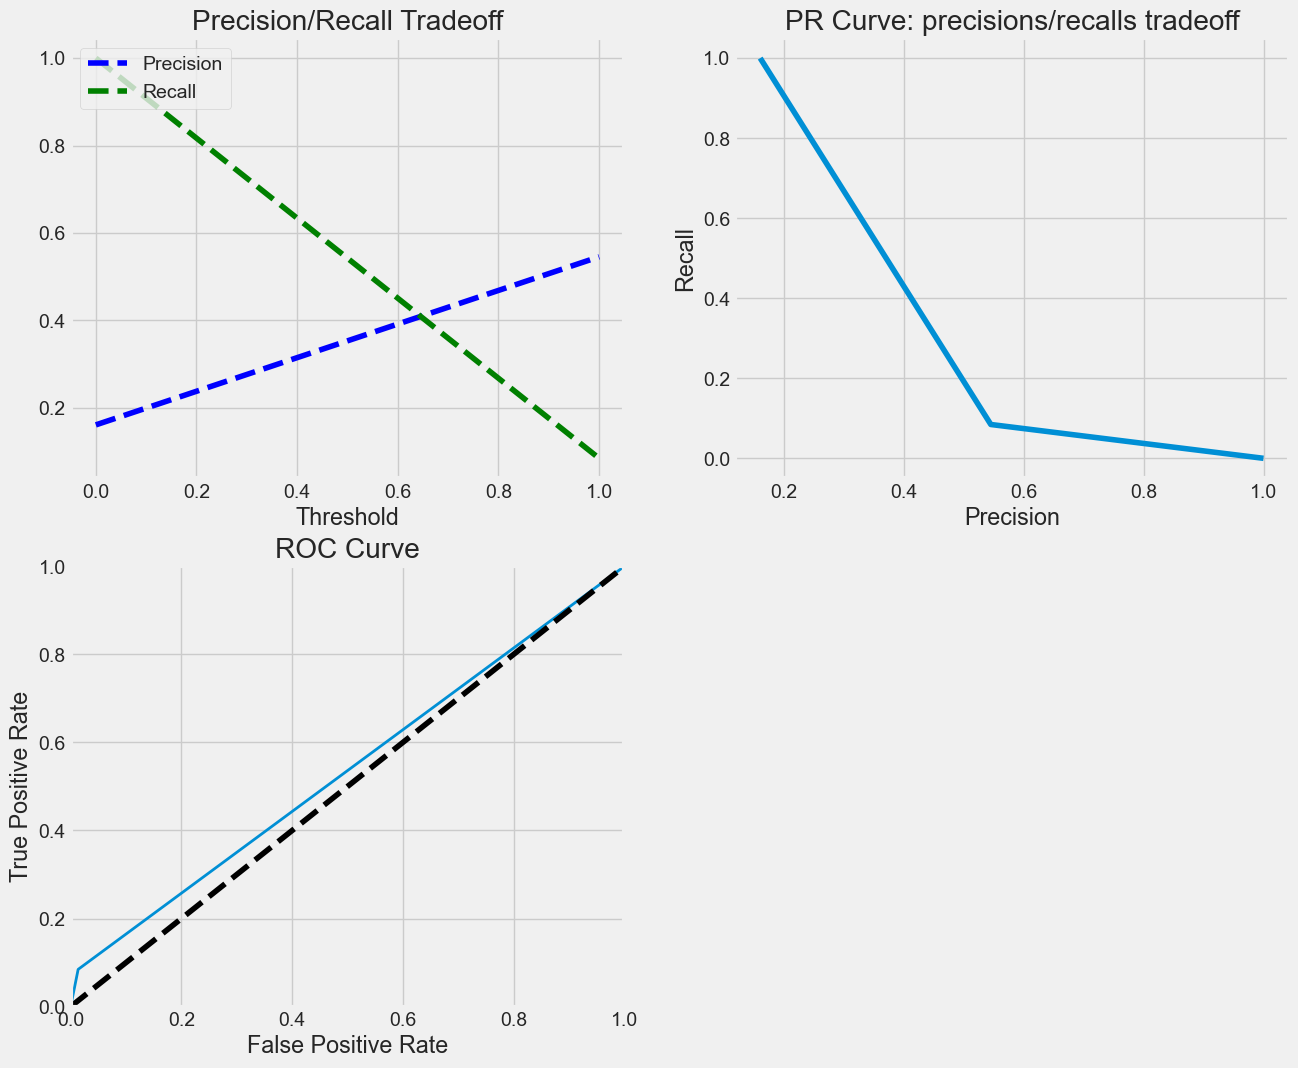

In [22]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [23]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

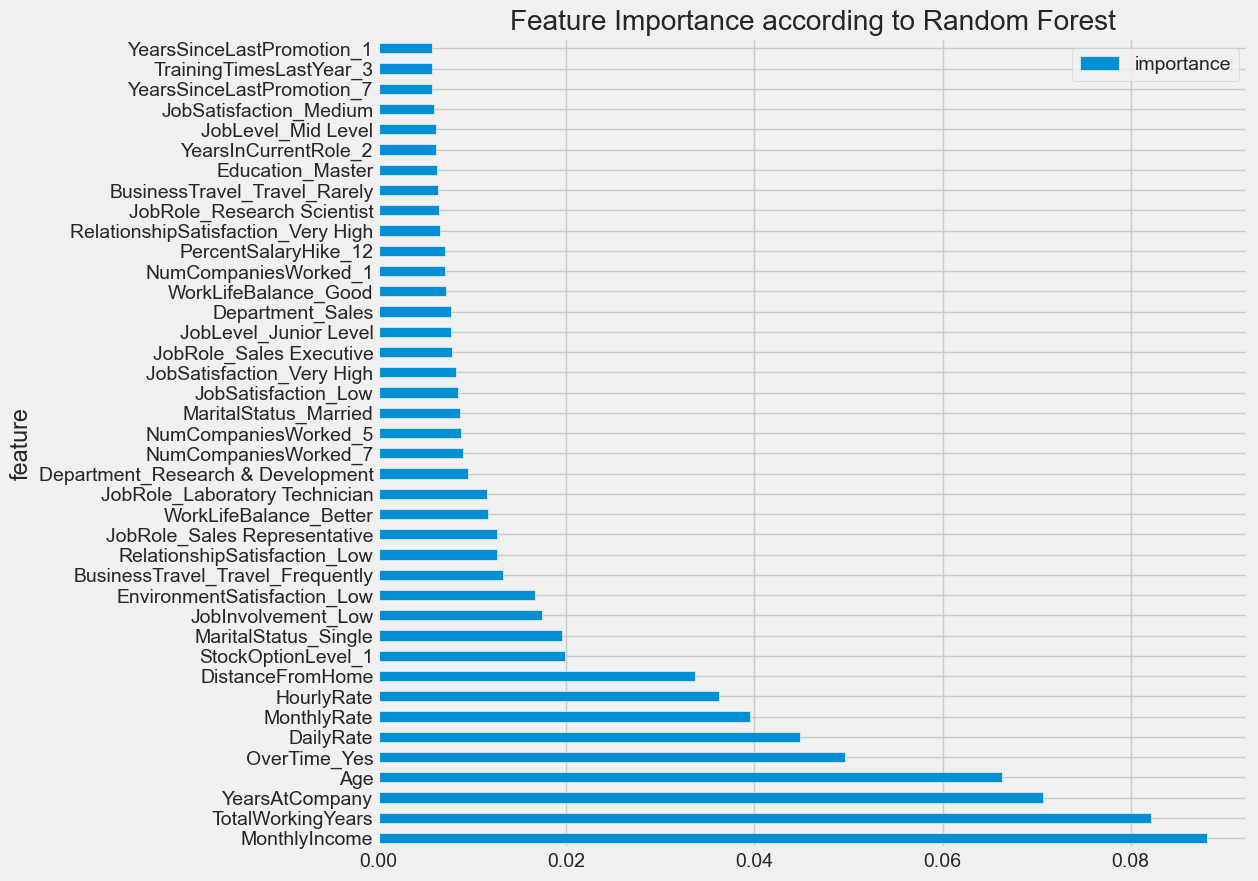

In [24]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')